In [1]:
!pip install tradingeconomics

In [2]:
import tradingeconomics as te
import numpy as np

In [3]:
api_key= "3cfb51495de84f9:ku5xzon6e63jmas"

In [4]:
te.login(api_key)

'Logged with 3cfb51495de84f9'

In [60]:
con_list= ["mexico", "sweden", "thailand", "new zealand"]
ind_list= ["Imports", "Exports"]
inidt= "2000-01-01"
enddt= "2023-12-31"

In [61]:
df= te.getHistoricalData(country =con_list, indicator =ind_list, initDate= inidt, endDate= enddt, output_type = 'df')

In [62]:
df= df[['Country', 'Category', 'DateTime', 'Value', 'Frequency']]
df

,Country,Category,DateTime,Value,Frequency
0,Free accounts have access to the following cou...,,2024-09-13T06:33:44.0304549+00:00,0.000,None
1,Thailand,Imports,2023-12-31T00:00:00,21818.750,Monthly
2,Thailand,Exports,2023-12-31T00:00:00,22791.550,Monthly
3,Sweden,Imports,2023-12-31T00:00:00,158500.000,Monthly
4,Sweden,Exports,2023-12-31T00:00:00,160200.000,Monthly
...,...,...,...,...,...
2303,Sweden,Exports,2000-01-31T00:00:00,55900.000,Monthly
2304,New Zealand,Imports,2000-01-31T00:00:00,1770.920,Monthly
2305,New Zealand,Exports,2000-01-31T00:00:00,1776.920,Monthly
2306,Mexico,Imports,2000-01-31T00:00:00,11858.647,Monthly


In [67]:
inf_df= df.pivot_table(index=['Country', 'DateTime', 'Frequency'], columns='Category', values='Value', aggfunc='first').reset_index()
inf_df.index += 1
inf_df

Category,Country,DateTime,Frequency,Exports,Imports
1,Mexico,2000-01-31T00:00:00,Monthly,11252.743,11858.647
2,Mexico,2000-02-29T00:00:00,Monthly,13189.566,13439.078
3,Mexico,2000-03-31T00:00:00,Monthly,13575.435,13921.248
4,Mexico,2000-04-30T00:00:00,Monthly,12327.403,12717.859
5,Mexico,2000-05-31T00:00:00,Monthly,14654.687,15192.823
...,...,...,...,...,...
1150,Thailand,2023-10-31T00:00:00,Monthly,23578.830,24411.120
1151,Thailand,2023-11-30T00:00:00,Monthly,23479.710,25879.140
1152,Thailand,2023-12-31T00:00:00,Monthly,22791.550,21818.750
1153,Thailand,2020-05-22T00:00:00,Monthly,NaN,16485.890


In [69]:
Sweden= inf_df[inf_df['Country']== 'Sweden']
Mexico= inf_df[inf_df['Country']== 'Mexico']

(Category Country             DateTime Frequency   Exports   Imports
 577       Sweden  2000-01-31T00:00:00   Monthly   55900.0   48400.0
 578       Sweden  2000-02-29T00:00:00   Monthly   63600.0   52100.0
 579       Sweden  2000-03-31T00:00:00   Monthly   72900.0   58600.0
 580       Sweden  2000-04-30T00:00:00   Monthly   62900.0   51400.0
 581       Sweden  2000-05-31T00:00:00   Monthly   72200.0   59800.0
 ..           ...                  ...       ...       ...       ...
 860       Sweden  2023-08-31T00:00:00   Monthly  158400.0  166200.0
 861       Sweden  2023-09-30T00:00:00   Monthly  185400.0  182900.0
 862       Sweden  2023-10-31T00:00:00   Monthly  194600.0  187000.0
 863       Sweden  2023-11-30T00:00:00   Monthly  190100.0  179800.0
 864       Sweden  2023-12-31T00:00:00   Monthly  160200.0  158500.0
 
 [288 rows x 5 columns],
 Category Country             DateTime Frequency    Exports    Imports
 1         Mexico  2000-01-31T00:00:00   Monthly  11252.743  11858.647
 2 

In [81]:
sweden_ex= np.array(list(Sweden['Exports']))
mexico_ex= np.array(list(Mexico['Exports']))
sweden_im= np.array(list(Sweden['Imports']))
mexico_im= np.array(list(Mexico['Imports']))
sdate= np.array(list(Sweden['DateTime']))
mdate= np.array(list(Mexico['DateTime']))

In [74]:
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


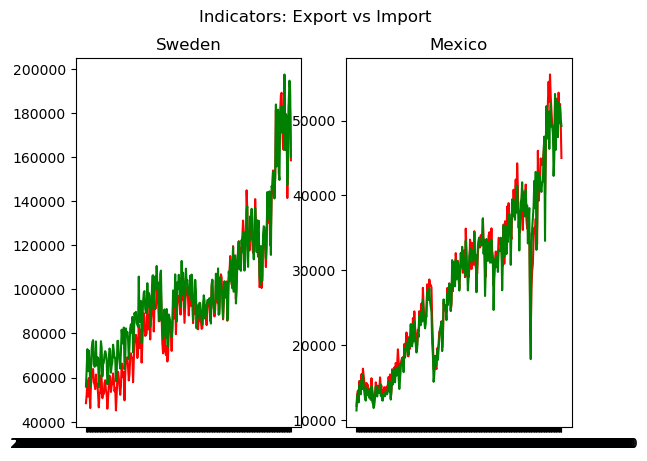

In [87]:
plt.subplot(2,1,1)
plt.plot(date, sweden_im, c= 'red') 
plt.plot(date, sweden_ex, c= 'green')
plt.title('Sweden')

plt.subplot(2,1,2)
plt.plot(date, mexico_im, c= 'red') 
plt.plot(date, mexico_ex, c= 'green')
plt.title('Mexico')

plt.suptitle('Indicators: Export vs Import')
plt.show()